Comienzo del Proyecto de Analisis de Datos

Importamos las Librerias necesarias 

In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el csv que vamos a usar

In [841]:
accidentes = pd.read_csv("AccidentesAviones.csv")
accidentes.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


## Acomodo los nombres de las columnas

In [842]:
nuevo_nombre = {'Unnamed: 0': 'ID'}
accidentes.rename(columns=nuevo_nombre, inplace=True)

In [843]:
accidentes = accidentes.rename(columns={'HORA declarada': 'Hora'})

In [844]:
accidentes = accidentes.rename(columns={'fecha': 'Fecha'})

In [845]:
accidentes = accidentes.rename(columns={'OperadOR': 'Operador'})

In [846]:
accidentes = accidentes.rename(columns={'ac_type': 'Tipo_Aeronave'})

In [847]:
accidentes = accidentes.rename(columns={'registration': 'Registro'})

In [848]:
accidentes = accidentes.rename(columns={'all_aboard': 'Todos_abordo'})

In [849]:
accidentes = accidentes.rename(columns={'PASAJEROS A BORDO': 'Pasajeros_abordo'})

In [850]:
accidentes = accidentes.rename(columns={'crew_aboard': 'Tripulacion_abordo'})

In [851]:
accidentes = accidentes.rename(columns={'cantidad de fallecidos': 'cant_fallecidos'})

In [852]:
accidentes = accidentes.rename(columns={'passenger_fatalities': 'Pasajeros_fallecidos'})

In [853]:
accidentes = accidentes.rename(columns={'crew_fatalities': 'Tripulacion_fallecidos'})

In [854]:
accidentes = accidentes.rename(columns={'ground': 'Tierra'})

In [855]:
accidentes = accidentes.rename(columns={'summary': 'Resumen'})

In [856]:

print(f"Cantidad de registros sin eliminar duplicados: {len(accidentes)}.") # Imprimimos por pantalla la cantidad de registros antes de eliminar duplicados
accidentes.drop_duplicates() # Eliminamos los valores duplicados
print(f"Cantidad de registros habiendo eliminado duplicados: {len(accidentes)}.") # Imprimimos la cantidad de registros sin los duplicados

Cantidad de registros sin eliminar duplicados: 5008.
Cantidad de registros habiendo eliminado duplicados: 5008.


## Cambio los datos del data frame que tienen "?" por "NaN"

In [857]:
accidentes.replace('?', np.nan, inplace=True)
accidentes.head()

,ID,Fecha,Hora,Ruta,Operador,flight_no,route,Tipo_Aeronave,Registro,cn_ln,Todos_abordo,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


## Convertir la columna "Hora" a cadena de texto y agregar ":" en el formato de hora

In [858]:
accidentes['Hora'] = accidentes['Hora'].astype(str).str.zfill(4).str[:2] + ':' + accidentes['Hora'].astype(str).str.zfill(4).str[2:]
accidentes.head()

,ID,Fecha,Hora,Ruta,Operador,flight_no,route,Tipo_Aeronave,Registro,cn_ln,Todos_abordo,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",0n:an,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",0n:an,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


## Cambio los datos que aparecen como "On:an" por "NaN"

In [859]:
def convertir_hora(valor):
    try:
        #convertir el valor en un formato válido de hora
        partes = valor.split(":")
        if len(partes) == 2:
            horas = int(partes[0])
            minutos = int(partes[1])
            if 0 <= horas <= 23 and 0 <= minutos <= 59:
                return f"{horas:02d}:{minutos:02d}"
    except (ValueError, AttributeError):
        pass
    return np.nan

# Aplico la función a la columna "HORA declarada"
accidentes['Hora'] = accidentes['Hora'].apply(convertir_hora)

In [860]:
accidentes.head()

,ID,Fecha,Hora,Ruta,Operador,flight_no,route,Tipo_Aeronave,Registro,cn_ln,Todos_abordo,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


## Ahora vamos a acomodar la columna de fecha

In [861]:
# Convierte la columna "fecha" a tipo de dato datetime
accidentes['Fecha'] = pd.to_datetime(accidentes['Fecha'], dayfirst=True)

# Formatea la columna "fecha" en el nuevo formato "dd-MM-yyyy"
accidentes['Fecha'] = accidentes['Fecha'].dt.strftime('%d-%m-%Y')

accidentes.head()

,ID,Fecha,Hora,Ruta,Operador,flight_no,route,Tipo_Aeronave,Registro,cn_ln,Todos_abordo,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen
0,0,17-09-1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,07-09-1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,12-07-1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,06-08-1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,09-09-1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


## Creo la columna "Pais" sacando el pais de la columna "Ruta"

In [862]:
# Lista de estados de Estados Unidos
estados_usa = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
    'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
    'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]
paises = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
    'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
    'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
    'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
    'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
    'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador','England', 'Equatorial Guinea', 'Eritrea', 'Estonia',
    'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
    'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
    'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel',
    'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait',
    'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
    'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco',
    'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
    'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'North Macedonia',
    'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay',
    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
    'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
    'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa',
    'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland',
    'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
    'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City',
    'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'
]

# Función para asignar el país correspondiente a una ruta en la columna "Ruta"
def asignar_pais(ruta):
    if isinstance(ruta, str):
        # Verificar si la ruta menciona un estado de Estados Unidos
        for estado in estados_usa:
            if estado.lower() in ruta.lower():
                return 'United States'
        
        # Verificar si la ruta menciona un país
        for pais in paises:
            if pais.lower() in ruta.lower():
                return pais
    
    return 'Anywhere'

# Crea la nueva columna "Pais" aplicando la función a la columna "Ruta"
accidentes['Pais'] = accidentes['Ruta'].apply(asignar_pais)


In [863]:
accidentes.head()

,ID,Fecha,Hora,Ruta,Operador,flight_no,route,Tipo_Aeronave,Registro,cn_ln,Todos_abordo,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen,Pais
0,0,17-09-1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",United States
1,1,07-09-1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,France
2,2,12-07-1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,United States
3,3,06-08-1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,Canada
4,4,09-09-1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...,Anywhere


## Coloco la columna "Pais" al lado de la columna "Ruta"

In [864]:
columnas = list(accidentes.columns)
columnas.remove('Pais')  # Elimina la columna "pais" de la lista
columnas.insert(columnas.index('Ruta') + 1, 'Pais')  # Inserta "pais" después de "Ruta"
accidentes = accidentes[columnas]  # Actualiza el DataFrame con la nueva ubicación de "pais"
accidentes.head()           

,ID,Fecha,Hora,Ruta,Pais,Operador,flight_no,route,Tipo_Aeronave,Registro,cn_ln,Todos_abordo,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen
0,0,17-09-1908,17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,07-09-1909,NaN,"Juvisy-sur-Orge, France",France,NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,12-07-1912,06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,06-08-1913,NaN,"Victoria, British Columbia, Canada",Canada,Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,09-09-1913,18:30,Over the North Sea,Anywhere,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


## Creo una nueva columna "Año" extraida de la columna "Fecha"

In [865]:
accidentes['Fecha'] = pd.to_datetime(accidentes['Fecha'], format='%d-%m-%Y', errors='coerce')

# Extrae el año y crea una nueva columna llamada "año"
accidentes['Año'] = accidentes['Fecha'].dt.year
accidentes.head()

,ID,Fecha,Hora,Ruta,Pais,Operador,flight_no,route,Tipo_Aeronave,Registro,cn_ln,Todos_abordo,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen,Año
0,0,1908-09-17,17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908
1,1,1909-09-07,NaN,"Juvisy-sur-Orge, France",France,NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909
2,2,1912-07-12,06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912
3,3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Canada,Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913
4,4,1913-09-09,18:30,Over the North Sea,Anywhere,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913


In [866]:
# Agrupa los datos por el año y calcula la cantidad de accidentes por año
accidentes['Accidentes_año'] = accidentes.groupby("Fecha")['Fecha'].transform('count')
accidentes.head()

,ID,Fecha,Hora,Ruta,Pais,Operador,flight_no,route,Tipo_Aeronave,Registro,...,Todos_abordo,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen,Año,Accidentes_año
0,0,1908-09-17,17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,...,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,1
1,1,1909-09-07,NaN,"Juvisy-sur-Orge, France",France,NaN,NaN,Air show,Wright Byplane,SC1,...,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1
2,2,1912-07-12,06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,...,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912,1
3,3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Canada,Private,NaN,NaN,Curtiss seaplane,NaN,...,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913,1
4,4,1913-09-09,18:30,Over the North Sea,Anywhere,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,...,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913,1


In [867]:
nuevo_nombre = {'Unnamed: 0': 'ID'}
accidentes.rename(columns=nuevo_nombre, inplace=True)

In [868]:
# Convertir las columnas a valores numéricos y reemplazar los valores no numéricos con cero
accidentes['Todos_abordo'] = pd.to_numeric(accidentes['Todos_abordo'], errors='coerce').fillna(0)
accidentes['cant_fallecidos'] = pd.to_numeric(accidentes['cant_fallecidos'], errors='coerce').fillna(0)

# Agregar la columna "sobrevivientes"
accidentes['sobrevivientes'] = accidentes['Todos_abordo'] - accidentes['cant_fallecidos']
accidentes.head()

,ID,Fecha,Hora,Ruta,Pais,Operador,flight_no,route,Tipo_Aeronave,Registro,...,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen,Año,Accidentes_año,sobrevivientes
0,0,1908-09-17,17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,...,1,1,1.0,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,1,1.0
1,1,1909-09-07,NaN,"Juvisy-sur-Orge, France",France,NaN,NaN,Air show,Wright Byplane,SC1,...,0,1,1.0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1,0.0
2,2,1912-07-12,06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,...,0,5,5.0,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912,1,0.0
3,3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Canada,Private,NaN,NaN,Curtiss seaplane,NaN,...,0,1,1.0,0,1,0,The first fatal airplane accident in Canada oc...,1913,1,0.0
4,4,1913-09-09,18:30,Over the North Sea,Anywhere,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,...,NaN,NaN,14.0,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913,1,6.0


In [869]:
accidentes.head()

,ID,Fecha,Hora,Ruta,Pais,Operador,flight_no,route,Tipo_Aeronave,Registro,...,Pasajeros_abordo,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen,Año,Accidentes_año,sobrevivientes
0,0,1908-09-17,17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,...,1,1,1.0,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,1,1.0
1,1,1909-09-07,NaN,"Juvisy-sur-Orge, France",France,NaN,NaN,Air show,Wright Byplane,SC1,...,0,1,1.0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1,0.0
2,2,1912-07-12,06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,...,0,5,5.0,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912,1,0.0
3,3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Canada,Private,NaN,NaN,Curtiss seaplane,NaN,...,0,1,1.0,0,1,0,The first fatal airplane accident in Canada oc...,1913,1,0.0
4,4,1913-09-09,18:30,Over the North Sea,Anywhere,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,...,NaN,NaN,14.0,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913,1,6.0


## explicar el grafico

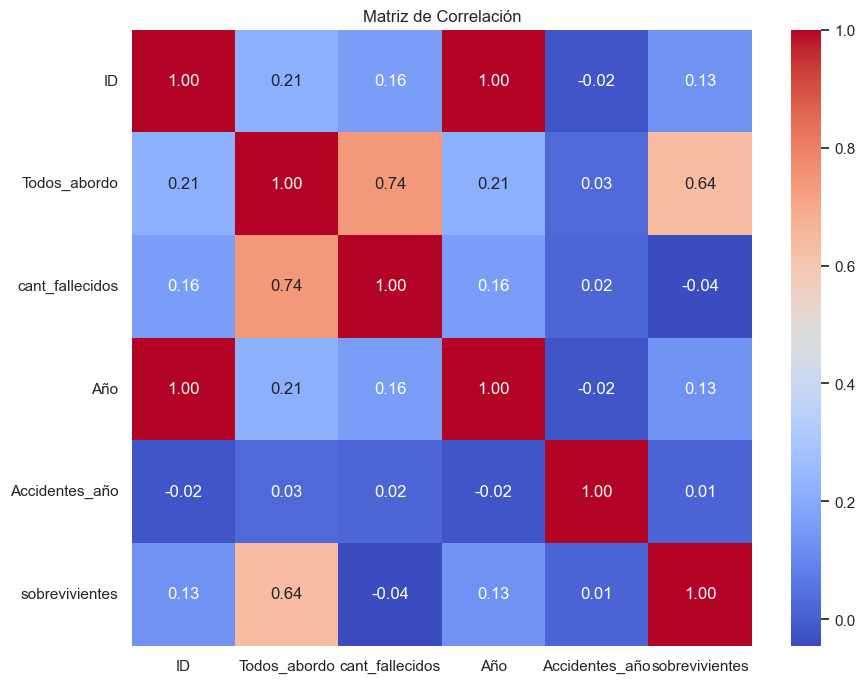

In [870]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
columnas_numericas = accidentes.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")

# Agregar un título al gráfico
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()

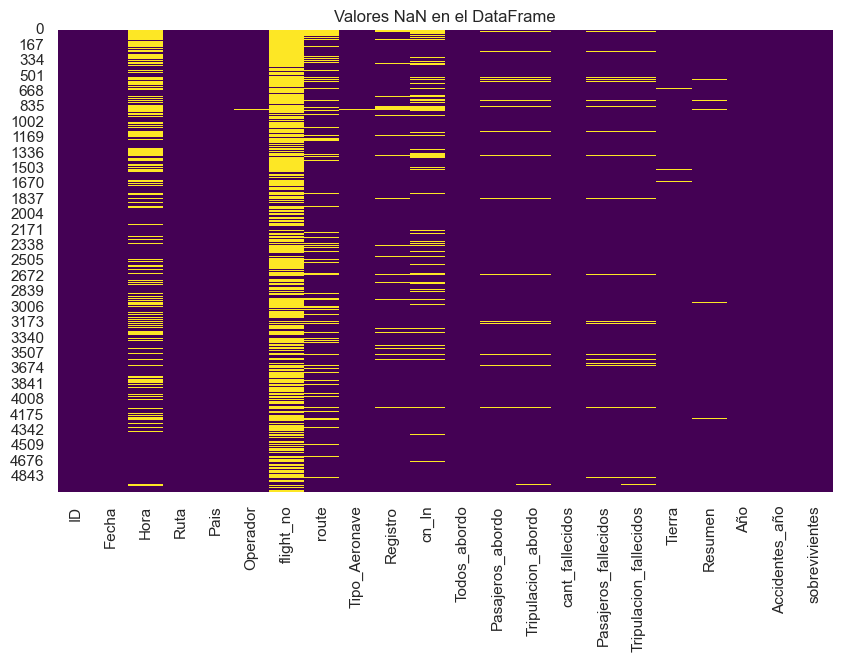

In [871]:
plt.figure(figsize=(10, 6))
sns.heatmap(accidentes.isnull(), cbar=False, cmap='viridis')

# Agregar un título al gráfico
plt.title("Valores NaN en el DataFrame")

# Mostrar el gráfico
plt.show()

# Identificar los Outliers mediante un Boxplot

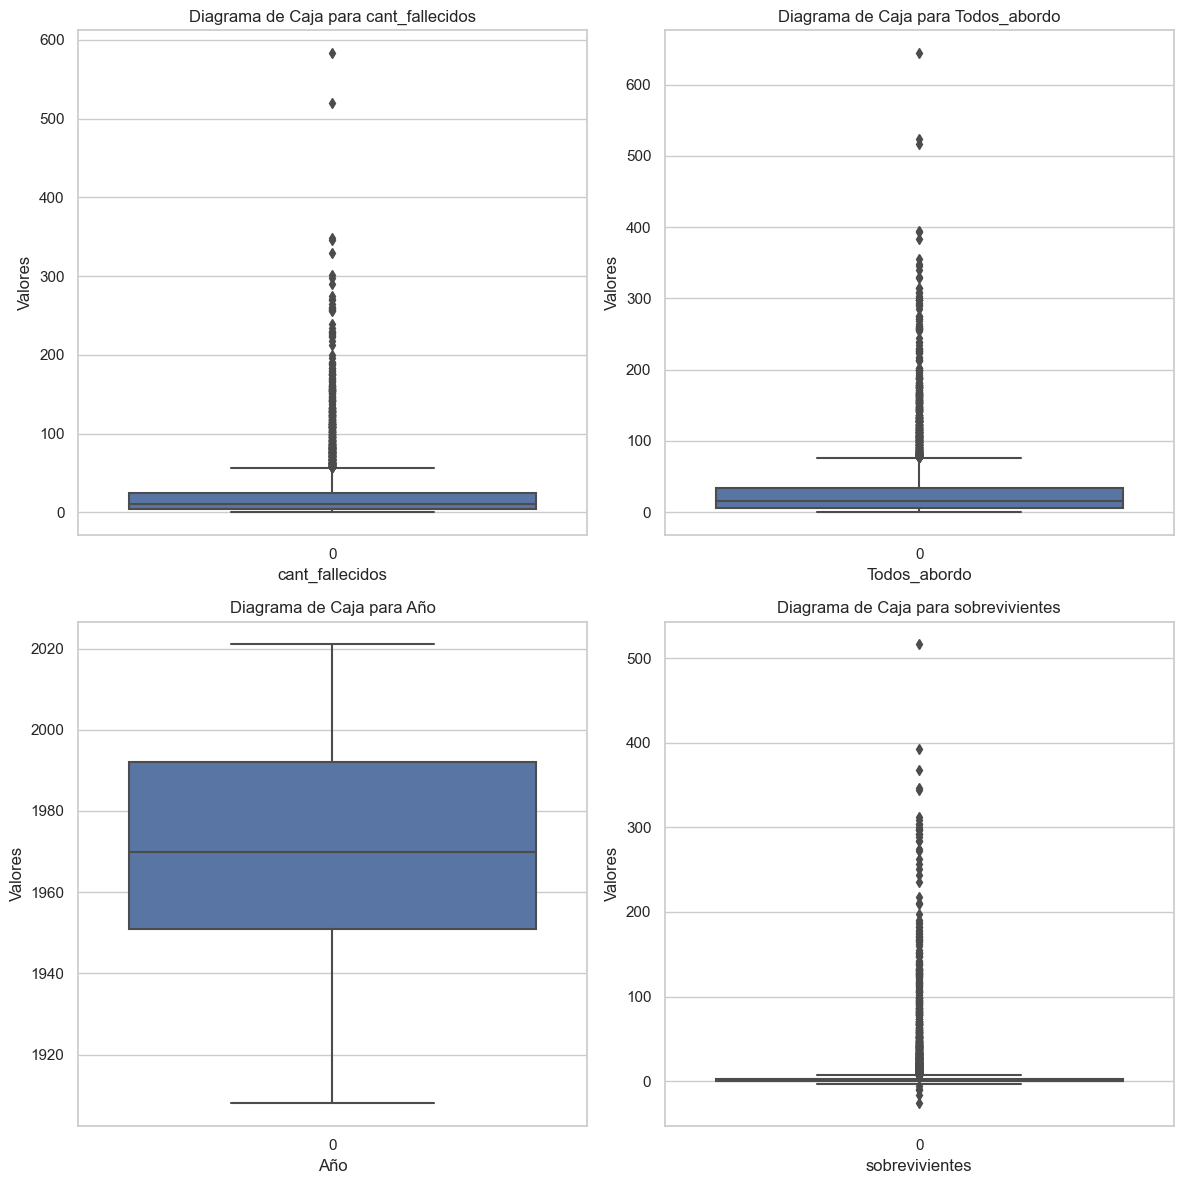

In [873]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado "accidentes" con tus datos
# y una lista de las columnas numéricas que deseas analizar
columnas_numericas = ['cant_fallecidos', 'Todos_abordo', 'Año', 'sobrevivientes']

# Crear subplots con dos filas y dos columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.ravel()  # Convertir el arreglo 2D de ejes en un arreglo 1D

# Iterar a través de las columnas numéricas y crear un boxplot para cada una
for i, columna in enumerate(columnas_numericas):
    sns.boxplot(data=accidentes[columna], ax=axs[i])
    axs[i].set_title(f'Diagrama de Caja para {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Valores')

plt.tight_layout()
plt.show()


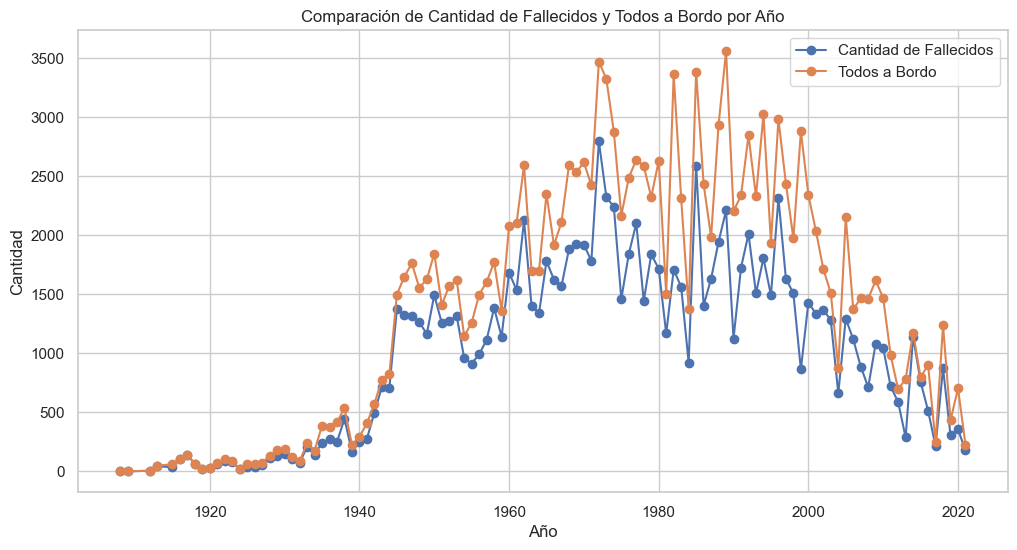

In [874]:
# Agrupar los datos por año y calcular la suma de fallecidos y todos a bordo
agrupado_por_año = accidentes.groupby('Año')[['cant_fallecidos', 'Todos_abordo']].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(agrupado_por_año['Año'], agrupado_por_año['cant_fallecidos'], label='Cantidad de Fallecidos', marker='o')
plt.plot(agrupado_por_año['Año'], agrupado_por_año['Todos_abordo'], label='Todos a Bordo', marker='o')

plt.title('Comparación de Cantidad de Fallecidos y Todos a Bordo por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend()

plt.grid(True)
plt.show()

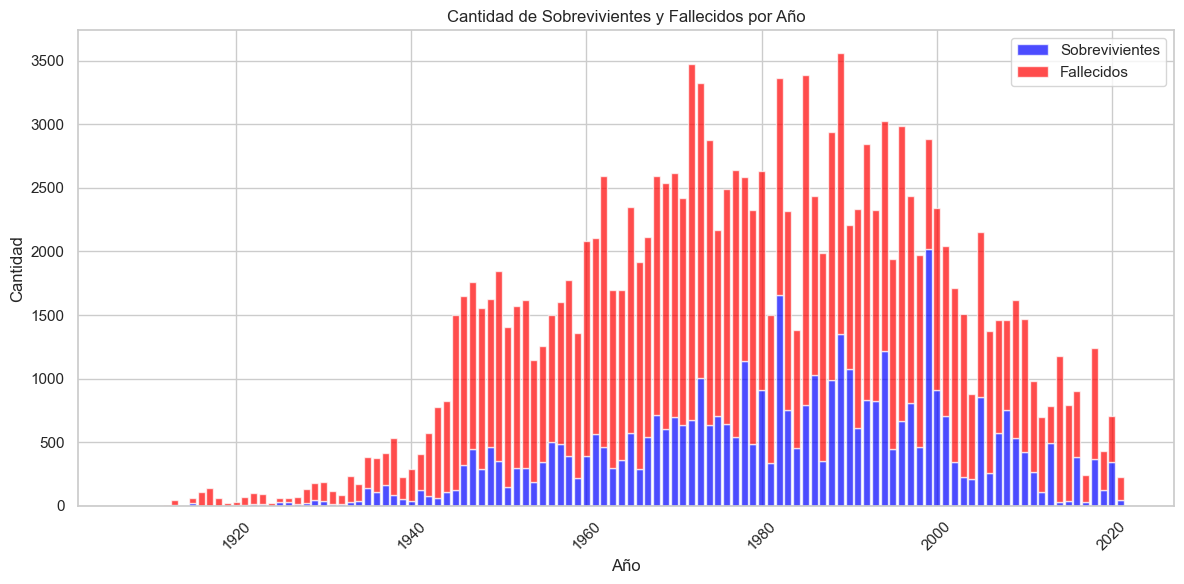

In [875]:
# Agrupa los datos por año y suma las columnas "sobrevivientes" y "cant_fallecidos"
datos_por_año = accidentes.groupby('Año')[['sobrevivientes', 'cant_fallecidos']].sum().reset_index()

# Define los datos
años = datos_por_año['Año']
sobrevivientes = datos_por_año['sobrevivientes']
fallecidos = datos_por_año['cant_fallecidos']

# Crea un gráfico de barras para mostrar sobrevivientes y fallecidos
plt.figure(figsize=(12, 6))
plt.bar(años, sobrevivientes, label='Sobrevivientes', color='blue', alpha=0.7)
plt.bar(años, fallecidos, label='Fallecidos', color='red', alpha=0.7, bottom=sobrevivientes)

# Personaliza el gráfico
plt.title('Cantidad de Sobrevivientes y Fallecidos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend()

# Muestra el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 mas accidentes por pais

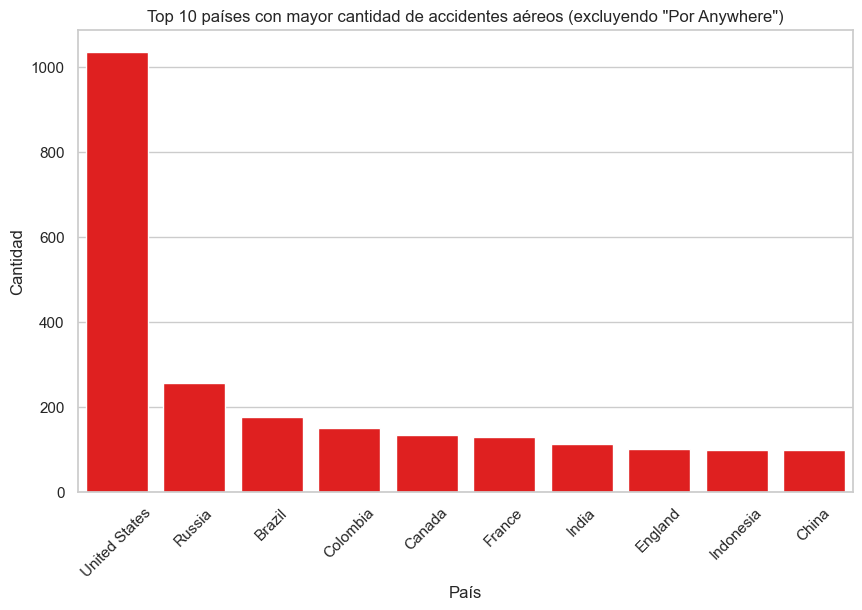

In [876]:
# Filtramos los datos para excluir el país "Por Ahí"
filtramos_pais = accidentes[accidentes['Pais'] != 'Anywhere']

# Calculamos el recuento de accidentes por país, top 10
suma_pais = filtramos_pais['Pais'].value_counts().head(10)

# Creamos un DataFrame con los datos de recuento
paises_con_mas_accidentes = pd.DataFrame({'Pais': suma_pais.index, 'suma_pais': suma_pais.values})

# Creamos el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Pais', y='suma_pais', data=paises_con_mas_accidentes, color='red')
plt.title('Top 10 países con mayor cantidad de accidentes aéreos (excluyendo "Por Anywhere")')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


In [877]:
paises_con_mas_accidentes.head(10)

,Pais,suma_pais
0,United States,1036
1,Russia,255
2,Brazil,176
3,Colombia,150
4,Canada,133
5,France,129
6,India,112
7,England,101
8,Indonesia,99
9,China,98


## Cantidad de accidentes por tipo de operador

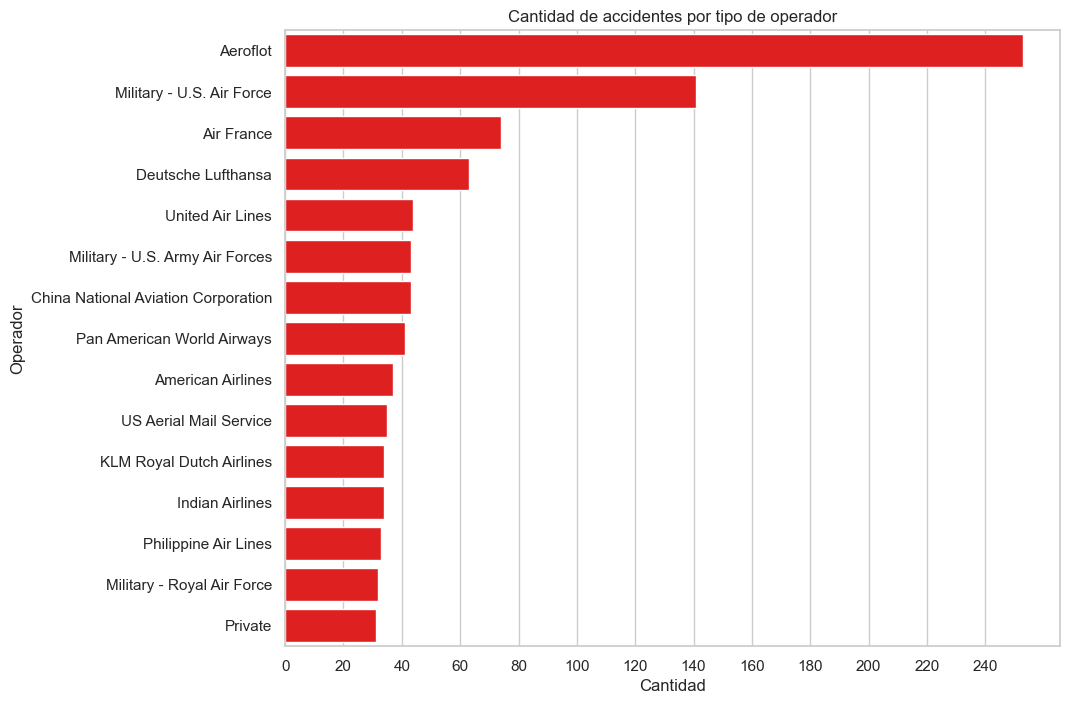

In [878]:
# Calculamos el recuento de accidentes por tipo de aeronave
operador_suma = accidentes['Operador'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento 
top_10_operador = pd.DataFrame({'Operador': operador_suma.index, 'Cant_accidentes': operador_suma.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Cant_accidentes', y='Operador', data=top_10_operador, color="red")
plt.title('Cantidad de accidentes por tipo de operador')
plt.xlabel('Cantidad')
plt.ylabel('Operador')
plt.xticks(range(0, max(top_10_operador['Cant_accidentes']) + 1, 20))
plt.show()

In [879]:
operador_suma.head()

Operador
Aeroflot                     253
Military - U.S. Air Force    141
Air France                    74
Deutsche Lufthansa            63
United Air Lines              44
Name: count, dtype: int64

## Cantidad de accidentes por tipo de avion

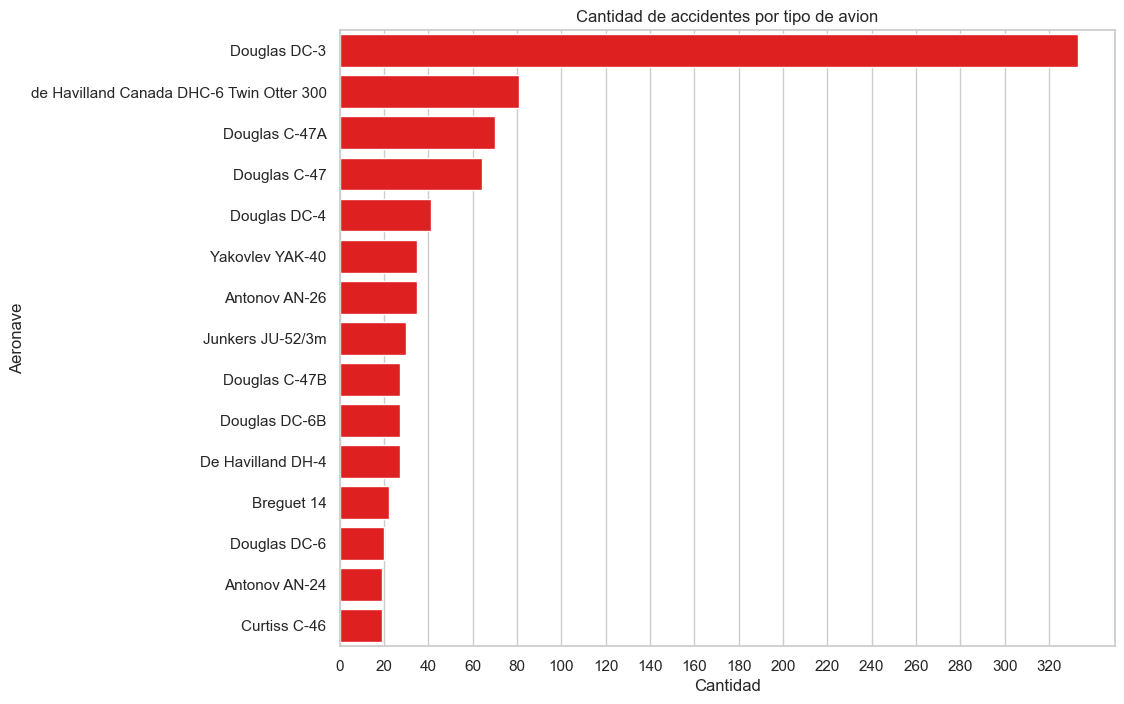

In [880]:
# Calculamos el recuento de accidentes por tipo de aeronave (tomamos las 15 más representativas)
aeronave_suma = accidentes['Tipo_Aeronave'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento 
top_10_aeronaves = pd.DataFrame({'Tipo_Aeronave': aeronave_suma.index, 'Cant_accidentes': aeronave_suma.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Cant_accidentes', y='Tipo_Aeronave', data=top_10_aeronaves, color="red")
plt.title('Cantidad de accidentes por tipo de avion')
plt.xlabel('Cantidad')
plt.ylabel('Aeronave')
plt.xticks(range(0, max(top_10_aeronaves['Cant_accidentes']) + 1, 20))
plt.show()

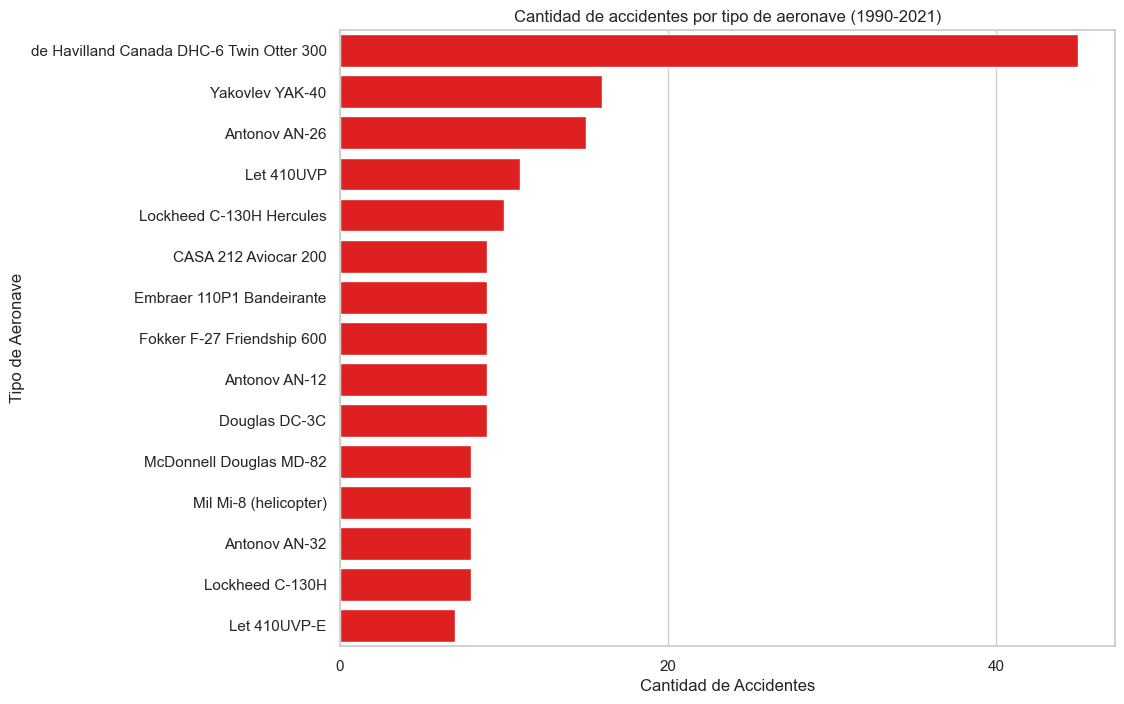

In [881]:
# Filtrar los datos para el período de 1990 a 2021
datos_1990_2021 = accidentes[(accidentes['Año'] >= 1990) & (accidentes['Año'] <= 2021)]

# Calcular el recuento de accidentes por tipo de aeronave (tomamos las 15 más representativas)
aeronave_suma = datos_1990_2021['Tipo_Aeronave'].value_counts().head(15)

# Crear un DataFrame con los datos de recuento
top_15_aeronaves = pd.DataFrame({'Tipo_Aeronave': aeronave_suma.index, 'Cant_accidentes': aeronave_suma.values})

# Crear el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Cant_accidentes', y='Tipo_Aeronave', data=top_15_aeronaves, color="red")
plt.title('Cantidad de accidentes por tipo de aeronave (1990-2021)')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipo de Aeronave')
plt.xticks(range(0, max(top_15_aeronaves['Cant_accidentes']) + 1, 20))
plt.show()

In [882]:
top_10_aeronaves.head()

,Tipo_Aeronave,Cant_accidentes
0,Douglas DC-3,333
1,de Havilland Canada DHC-6 Twin Otter 300,81
2,Douglas C-47A,70
3,Douglas C-47,64
4,Douglas DC-4,41


## Cantidad de accidentes cada 10 años

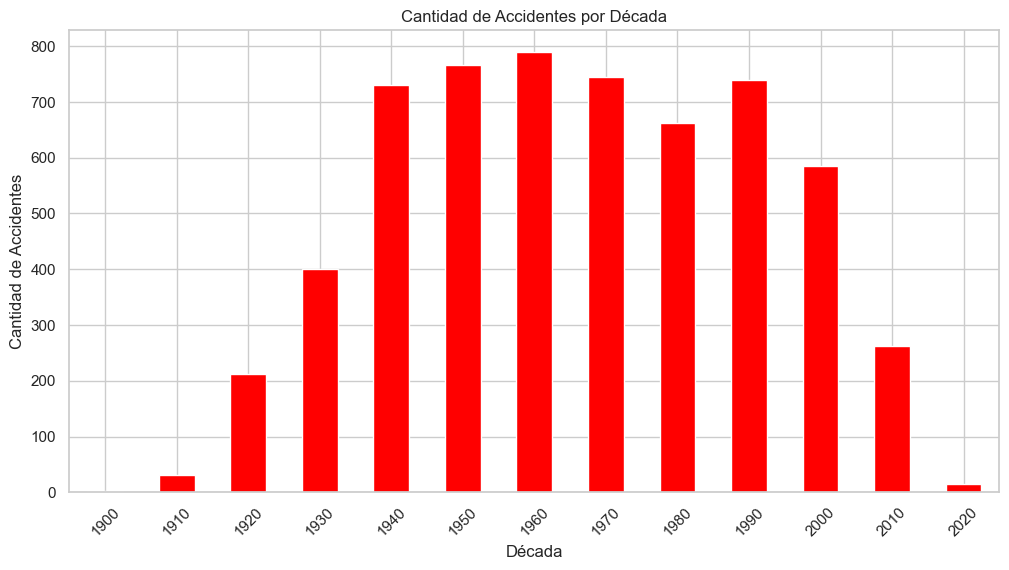

In [883]:
# Agrupar los datos por décadas (cada 10 años) y calcular la suma de accidentes para cada década
accidentes_por_decada = accidentes.groupby(accidentes['Año'] // 10 * 10)['Accidentes_año'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
accidentes_por_decada.plot(kind='bar', color='red')
plt.title('Cantidad de Accidentes por Década')
plt.xlabel('Década')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

## Top 10 de los años que hubo mas accidentes

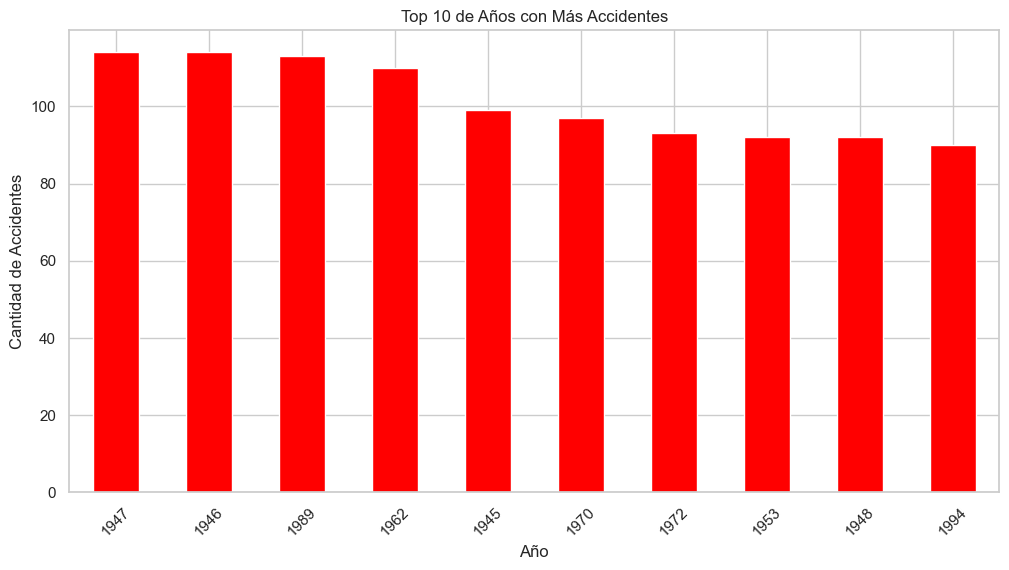

In [884]:
# Ordenar los años por la cantidad de accidentes en orden descendente
top_10_años = accidentes.groupby('Año')['Accidentes_año'].sum().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
top_10_años.plot(kind='bar', color='red')
plt.title('Top 10 de Años con Más Accidentes')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()


In [929]:
top_10_años

Año
1947    114
1946    114
1989    113
1962    110
1945     99
1970     97
1972     93
1953     92
1948     92
1994     90
Name: Accidentes_año, dtype: int64

## Top 10 de los meses con mas accidentes 

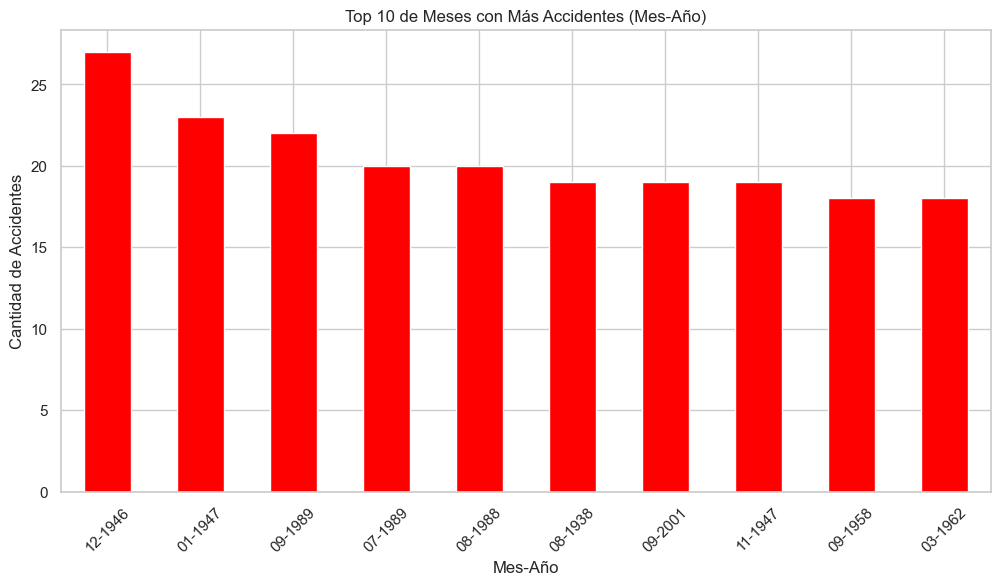

In [885]:
# Asegurarse de que la columna "fecha" esté en formato datetime
accidentes['Fecha'] = pd.to_datetime(accidentes['Fecha'], errors='coerce')

# Extraer el mes y el año de la columna "fecha" y crear una nueva columna "mes_año"
accidentes['mes_año'] = accidentes['Fecha'].dt.strftime('%m-%Y')

# Calcular la suma de accidentes para cada mes y año
accidentes_por_mes_año = accidentes.groupby('mes_año')['Accidentes_año'].sum()

# Ordenar los meses y años por la cantidad de accidentes en orden descendente
top_10_meses_año = accidentes_por_mes_año.sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
top_10_meses_año.plot(kind='bar', color='red')
plt.title('Top 10 de Meses con Más Accidentes (Mes-Año)')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

In [886]:
accidentes.head()

,ID,Fecha,Hora,Ruta,Pais,Operador,flight_no,route,Tipo_Aeronave,Registro,...,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen,Año,Accidentes_año,sobrevivientes,mes_año
0,0,1908-09-17,17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,...,1,1.0,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,1,1.0,09-1908
1,1,1909-09-07,NaN,"Juvisy-sur-Orge, France",France,NaN,NaN,Air show,Wright Byplane,SC1,...,1,1.0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1,0.0,09-1909
2,2,1912-07-12,06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,...,5,5.0,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912,1,0.0,07-1912
3,3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Canada,Private,NaN,NaN,Curtiss seaplane,NaN,...,1,1.0,0,1,0,The first fatal airplane accident in Canada oc...,1913,1,0.0,08-1913
4,4,1913-09-09,18:30,Over the North Sea,Anywhere,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,...,NaN,14.0,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913,1,6.0,09-1913


## Cantidad de fallecidos por accidentes aereos por año

In [887]:
accidentes['cant_fallecidos'] = pd.to_numeric(accidentes['cant_fallecidos'], errors='coerce')

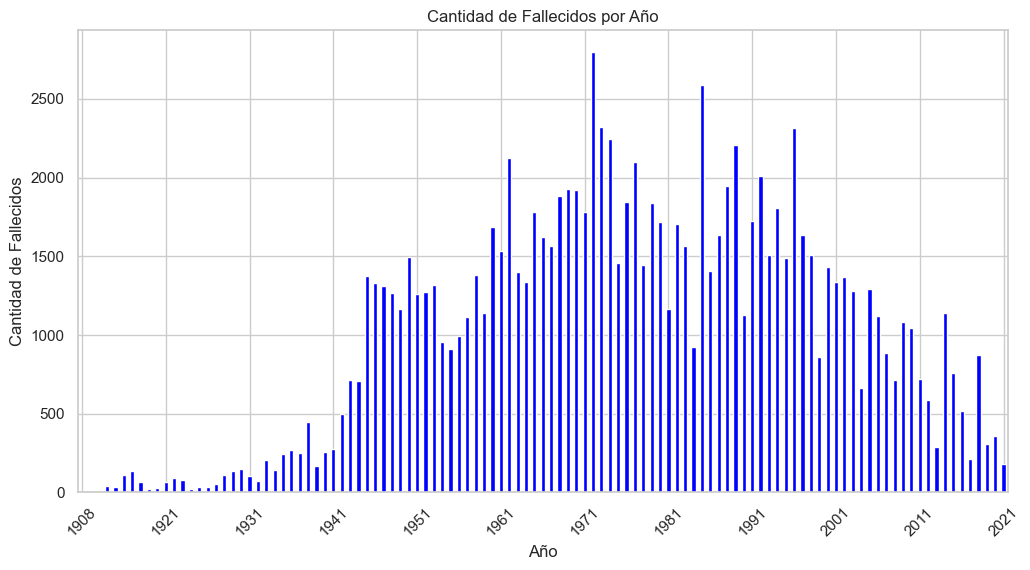

In [888]:
# Agrupa los datos por año y suma la cantidad de fallecidos en cada año
fallecidos_por_año = accidentes.groupby('Año')['cant_fallecidos'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
fallecidos_por_año.plot(kind='bar', color='blue')
plt.title('Cantidad de Fallecidos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Fallecidos')

# Personaliza los ticks del eje x para que aparezcan cada 10 años
plt.xticks(range(0, len(fallecidos_por_año), 10), rotation=45)

plt.show()

In [889]:
fallecidos_por_año.head()

Año
1908     1.0
1909     1.0
1912     5.0
1913    43.0
1915    36.0
Name: cant_fallecidos, dtype: float64

## Cantidad de fallecidos los ultimos 20 años

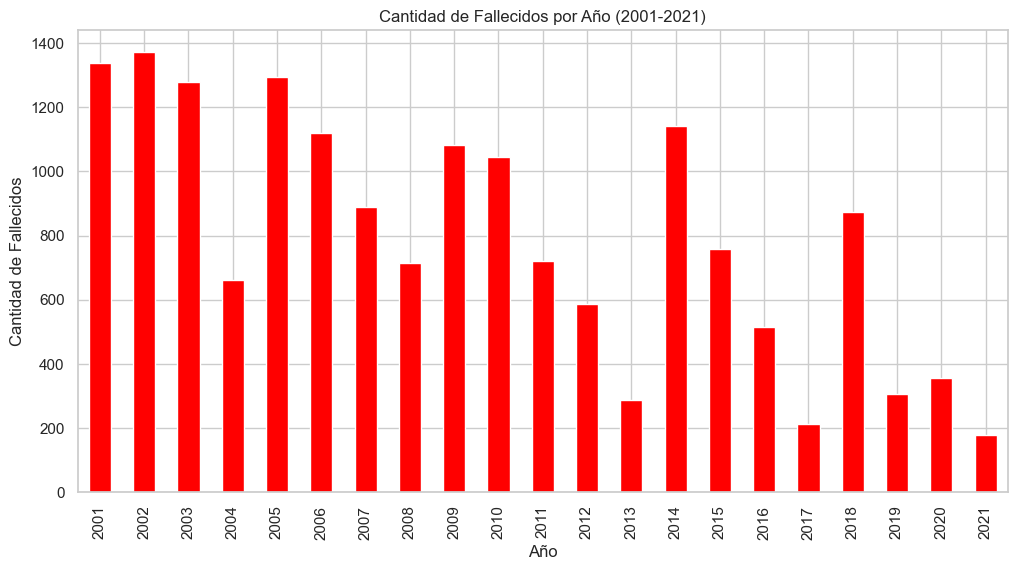

In [890]:
# Filtrar los datos para el período del 2001 al 2021
accidentes_2001_2021 = accidentes[(accidentes['Año'] >= 2001) & (accidentes['Año'] <= 2021)]

# Agrupar los datos por año y sumar la cantidad de fallecidos para cada año
fallecidos_por_año = accidentes_2001_2021.groupby('Año')['cant_fallecidos'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
fallecidos_por_año.plot(kind='bar', color='red')
plt.title('Cantidad de Fallecidos por Año (2001-2021)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Fallecidos')
plt.show()

In [891]:
fallecidos_por_año.head(10)

Año
2001    1336.0
2002    1371.0
2003    1279.0
2004     662.0
2005    1294.0
2006    1118.0
2007     888.0
2008     713.0
2009    1083.0
2010    1044.0
Name: cant_fallecidos, dtype: float64

## Top 10 de los paises con mas fallecidos 

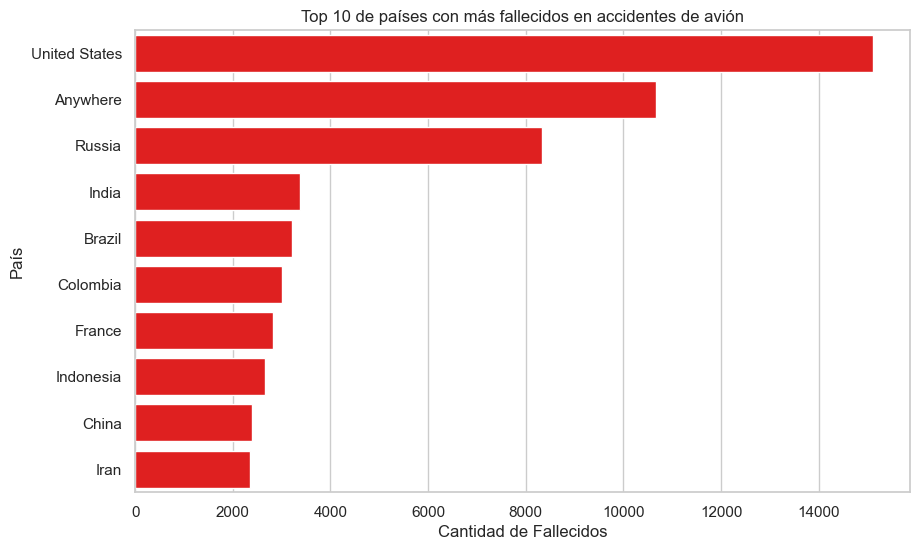

In [892]:

#Agrupa y suma las muertes por país
muertes_por_pais = accidentes.groupby('Pais')['cant_fallecidos'].sum().reset_index()

#Ordena los países por cantidad de muertes en orden descendente y toma los 10 primeros
top_10_paises = muertes_por_pais.sort_values(by='cant_fallecidos', ascending=False).head(10)

#Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cant_fallecidos', y='Pais', data=top_10_paises, color="red")
plt.title('Top 10 de países con más fallecidos en accidentes de avión')
plt.xlabel('Cantidad de Fallecidos')
plt.ylabel('País')
plt.show()

In [893]:
top_10_paises.head(10)

,Pais,cant_fallecidos
149,United States,15116.0
4,Anywhere,10674.0
116,Russia,8338.0
63,India,3382.0
20,Brazil,3214.0
30,Colombia,3015.0
50,France,2828.0
64,Indonesia,2662.0
29,China,2385.0
65,Iran,2351.0


## Top 10 de los paises con mas fallecidos en accidentes los ultimos 20 años

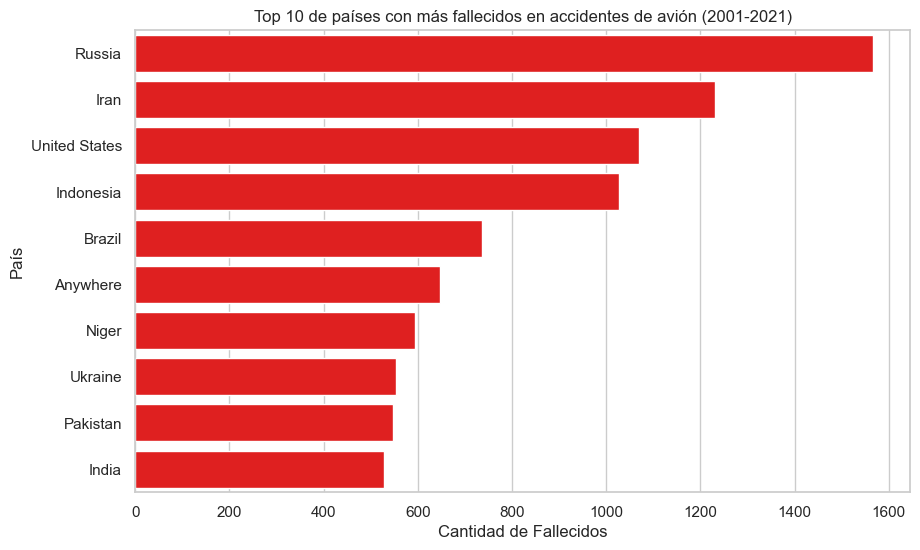

In [894]:
#Filtra los datos para incluir solo los años del 2001 al 2021
accidentes_2001_2021 = accidentes[(accidentes['Año'] >= 2001) & (accidentes['Año'] <= 2021)]

# Paso 2: Agrupa y suma las muertes por país
muertes_por_pais = accidentes_2001_2021.groupby('Pais')['cant_fallecidos'].sum().reset_index()

# Paso 3: Ordena los países por cantidad de muertes en orden descendente y toma los 10 primeros
top_10_paises = muertes_por_pais.sort_values(by='cant_fallecidos', ascending=False).head(10)

# Paso 4: Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cant_fallecidos', y='Pais', data=top_10_paises, color="red")
plt.title('Top 10 de países con más fallecidos en accidentes de avión (2001-2021)')
plt.xlabel('Cantidad de Fallecidos')
plt.ylabel('País')
plt.show()

## Top 10 de los tipos de aeronaves con mas fallecidos

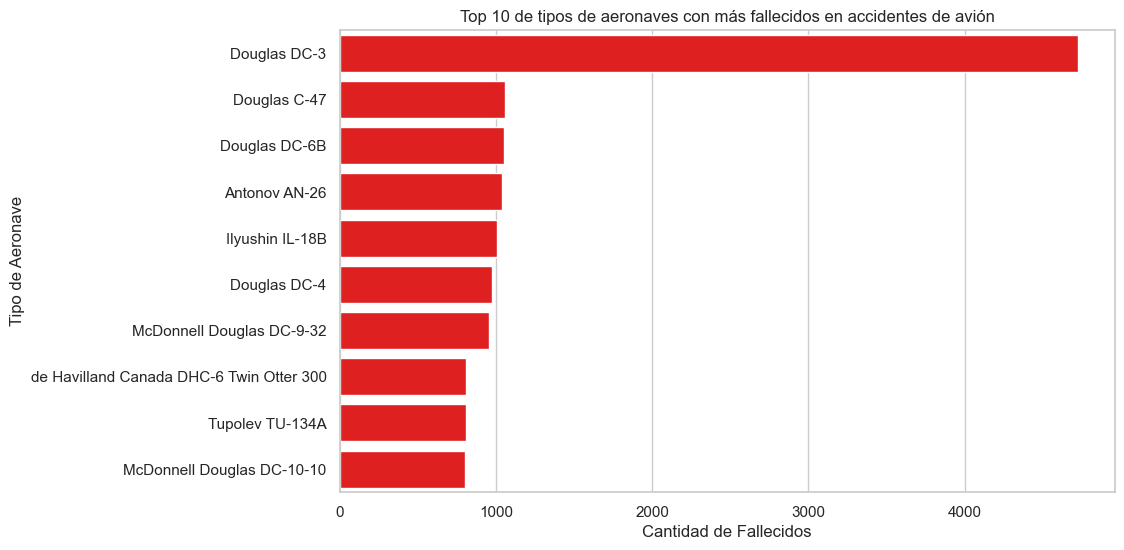

In [895]:
#Agrupa los datos por tipo de aeronave ("ac_type") y suma las muertes
muertes_por_tipo_aeronave = accidentes.groupby('Tipo_Aeronave')['cant_fallecidos'].sum().reset_index()

# Paso 2: Ordena los tipos de aeronaves por cantidad de muertes en orden descendente
muertes_por_tipo_aeronave = muertes_por_tipo_aeronave.sort_values(by='cant_fallecidos', ascending=False)

# Paso 3: Toma los 10 tipos de aeronaves principales
top_10_aeronaves = muertes_por_tipo_aeronave.head(10)

# Paso 4: Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cant_fallecidos', y='Tipo_Aeronave', data=top_10_aeronaves, color="red")
plt.title('Top 10 de tipos de aeronaves con más fallecidos en accidentes de avión')
plt.xlabel('Cantidad de Fallecidos')
plt.ylabel('Tipo de Aeronave')
plt.show()

## Top 10 de los tipos de aeronaves con mas fallecidos los ultimos 20 años

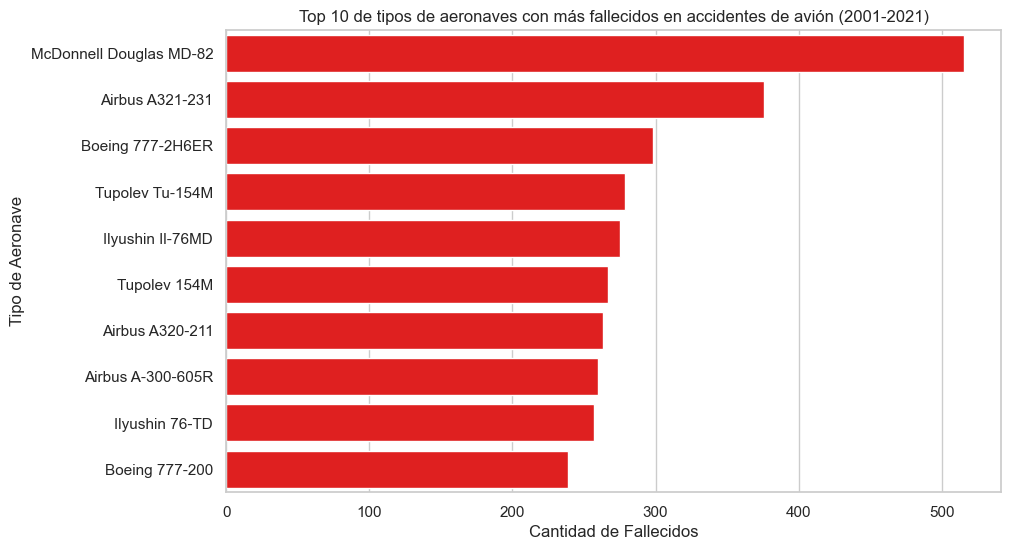

In [896]:
# Paso 1: Filtra los datos para incluir solo el período del 2001 al 2021
accidentes_periodo = accidentes[(accidentes['Año'] >= 2001) & (accidentes['Año'] <= 2021)]

# Paso 2: Agrupa los datos por tipo de aeronave ("ac_type") y suma las muertes
muertes_por_tipo_aeronave = accidentes_periodo.groupby('Tipo_Aeronave')['cant_fallecidos'].sum().reset_index()

# Paso 3: Ordena los tipos de aeronaves por cantidad de muertes en orden descendente
muertes_por_tipo_aeronave = muertes_por_tipo_aeronave.sort_values(by='cant_fallecidos', ascending=False)

# Paso 4: Toma los 10 tipos de aeronaves principales
top_10_aeronaves = muertes_por_tipo_aeronave.head(10)

# Paso 5: Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cant_fallecidos', y='Tipo_Aeronave', data=top_10_aeronaves, color='red')
plt.title('Top 10 de tipos de aeronaves con más fallecidos en accidentes de avión (2001-2021)')
plt.xlabel('Cantidad de Fallecidos')
plt.ylabel('Tipo de Aeronave')
plt.show()


In [897]:
accidentes.head()

,ID,Fecha,Hora,Ruta,Pais,Operador,flight_no,route,Tipo_Aeronave,Registro,...,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen,Año,Accidentes_año,sobrevivientes,mes_año
0,0,1908-09-17,17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,...,1,1.0,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,1,1.0,09-1908
1,1,1909-09-07,NaN,"Juvisy-sur-Orge, France",France,NaN,NaN,Air show,Wright Byplane,SC1,...,1,1.0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1,0.0,09-1909
2,2,1912-07-12,06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,...,5,5.0,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912,1,0.0,07-1912
3,3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Canada,Private,NaN,NaN,Curtiss seaplane,NaN,...,1,1.0,0,1,0,The first fatal airplane accident in Canada oc...,1913,1,0.0,08-1913
4,4,1913-09-09,18:30,Over the North Sea,Anywhere,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,...,NaN,14.0,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913,1,6.0,09-1913


In [898]:
# Convertir las columnas a valores numéricos y reemplazar los valores no numéricos con cero
accidentes['Todos_abordo'] = pd.to_numeric(accidentes['Todos_abordo'], errors='coerce').fillna(0)
accidentes['cant_fallecidos'] = pd.to_numeric(accidentes['cant_fallecidos'], errors='coerce').fillna(0)

# Agregar la columna "sobrevivientes"
accidentes['sobrevivientes'] = accidentes['Todos_abordo'] - accidentes['cant_fallecidos']
accidentes.head()

,ID,Fecha,Hora,Ruta,Pais,Operador,flight_no,route,Tipo_Aeronave,Registro,...,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen,Año,Accidentes_año,sobrevivientes,mes_año
0,0,1908-09-17,17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,...,1,1.0,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,1,1.0,09-1908
1,1,1909-09-07,NaN,"Juvisy-sur-Orge, France",France,NaN,NaN,Air show,Wright Byplane,SC1,...,1,1.0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1,0.0,09-1909
2,2,1912-07-12,06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,...,5,5.0,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912,1,0.0,07-1912
3,3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Canada,Private,NaN,NaN,Curtiss seaplane,NaN,...,1,1.0,0,1,0,The first fatal airplane accident in Canada oc...,1913,1,0.0,08-1913
4,4,1913-09-09,18:30,Over the North Sea,Anywhere,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,...,NaN,14.0,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913,1,6.0,09-1913


# Analisis de cuando fue mas segura viajar en avion desde 1908 hasta 2021

In [899]:
# Sumar todos los valores en la columna "accidentes_año"
total_accidentes = accidentes['Accidentes_año'].sum()

# Imprimir el resultado
print("Cantidad total de accidentes en todos los años:", total_accidentes)

Cantidad total de accidentes en todos los años: 5938


In [900]:
# Crear rangos de años
rangos_anuales = [(1908, 1921), (1921, 1931), (1931, 1941), (1941, 1951), (1951, 1961),
                  (1961, 1971), (1971, 1981), (1981, 1991), (1991, 2001), (2001, 2011),
                  (2011, 2021)]

# Inicializar un diccionario para almacenar los resultados
resultados = {}

# Iterar a través de los rangos de años y calcular la cantidad de accidentes para cada rango
for rango in rangos_anuales:
    inicio, fin = rango
    accidentes_en_rango = accidentes[(accidentes['Año'] >= inicio) & (accidentes['Año'] < fin)]
    total_accidentes_en_rango = accidentes_en_rango['Accidentes_año'].sum()
    resultados[f'{inicio}-{fin}'] = total_accidentes_en_rango

# Imprimir los resultados
for rango, cantidad in resultados.items():
    print(f"Cantidad de accidentes en el rango {rango}: {cantidad}")

Cantidad de accidentes en el rango 1908-1921: 53
Cantidad de accidentes en el rango 1921-1931: 220
Cantidad de accidentes en el rango 1931-1941: 403
Cantidad de accidentes en el rango 1941-1951: 778
Cantidad de accidentes en el rango 1951-1961: 767
Cantidad de accidentes en el rango 1961-1971: 806
Cantidad de accidentes en el rango 1971-1981: 700
Cantidad de accidentes en el rango 1981-1991: 683
Cantidad de accidentes en el rango 1991-2001: 735
Cantidad de accidentes en el rango 2001-2011: 564
Cantidad de accidentes en el rango 2011-2021: 222


In [901]:
# Crear rangos de años
rangos_anuales = [(1908, 1921), (1921, 1931), (1931, 1941), (1941, 1951), (1951, 1961),
                  (1961, 1971), (1971, 1981), (1981, 1991), (1991, 2001), (2001, 2011),
                  (2011, 2021)]

# Inicializar un diccionario para almacenar los resultados
resultados = {}

# Iterar a través de los rangos de años y calcular el porcentaje de muertes para cada rango
for rango in rangos_anuales:
    inicio, fin = rango
    accidentes_en_rango = accidentes[(accidentes['Año'] >= inicio) & (accidentes['Año'] < fin)]
    total_all_aboard = accidentes_en_rango['Todos_abordo'].sum()
    total_cantidad_fallecidos = accidentes_en_rango['cant_fallecidos'].sum()
    porcentaje_muertes = (total_cantidad_fallecidos / total_all_aboard) * 100
    resultados[f'{inicio}-{fin}'] = {'Porcentaje': porcentaje_muertes, 'Cantidad de Muertes': total_cantidad_fallecidos}

# Imprimir los resultados
for rango, valores in resultados.items():
    porcentaje = valores['Porcentaje']
    cantidad_muertes = valores['Cantidad de Muertes']
    print(f"Rango de años: {rango}, Porcentaje de muertes: {porcentaje:.2f}%, Cantidad de Muertes: {cantidad_muertes}")

Rango de años: 1908-1921, Porcentaje de muertes: 92.13%, Cantidad de Muertes: 445.0
Rango de años: 1921-1931, Porcentaje de muertes: 78.24%, Cantidad de Muertes: 766.0
Rango de años: 1931-1941, Porcentaje de muertes: 75.35%, Cantidad de Muertes: 2152.0
Rango de años: 1941-1951, Porcentaje de muertes: 80.98%, Cantidad de Muertes: 10136.0
Rango de años: 1951-1961, Porcentaje de muertes: 78.55%, Cantidad de Muertes: 12035.0
Rango de años: 1961-1971, Porcentaje de muertes: 77.00%, Cantidad de Muertes: 17107.0
Rango de años: 1971-1981, Porcentaje de muertes: 72.58%, Cantidad de Muertes: 19548.0
Rango de años: 1981-1991, Porcentaje de muertes: 64.90%, Cantidad de Muertes: 16268.0
Rango de años: 1991-2001, Porcentaje de muertes: 64.92%, Cantidad de Muertes: 16289.0
Rango de años: 2001-2011, Porcentaje de muertes: 68.80%, Cantidad de Muertes: 10788.0
Rango de años: 2011-2021, Porcentaje de muertes: 72.38%, Cantidad de Muertes: 5758.0


Por los resultados obtenidos pude sacar uan conclusion de que es mas seguro viajar hoy en dia que antes ya que hubo menos muertes y el porcentaje de muertes
es menor a cualquier otra epoca

In [902]:
accidentes.head()

,ID,Fecha,Hora,Ruta,Pais,Operador,flight_no,route,Tipo_Aeronave,Registro,...,Tripulacion_abordo,cant_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecidos,Tierra,Resumen,Año,Accidentes_año,sobrevivientes,mes_año
0,0,1908-09-17,17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,...,1,1.0,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,1,1.0,09-1908
1,1,1909-09-07,NaN,"Juvisy-sur-Orge, France",France,NaN,NaN,Air show,Wright Byplane,SC1,...,1,1.0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1,0.0,09-1909
2,2,1912-07-12,06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,...,5,5.0,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912,1,0.0,07-1912
3,3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Canada,Private,NaN,NaN,Curtiss seaplane,NaN,...,1,1.0,0,1,0,The first fatal airplane accident in Canada oc...,1913,1,0.0,08-1913
4,4,1913-09-09,18:30,Over the North Sea,Anywhere,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,...,NaN,14.0,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913,1,6.0,09-1913


## KPI´S 1

## Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior.

In [903]:
# Filtrar los datos para la década 2001-2011
datos_2001_2011 = accidentes[(accidentes['Año'] >= 2001) & (accidentes['Año'] < 2011)]

# Convertir la columna "Tripulacion_fallecidos" a tipo numérico (si es posible)
datos_2001_2011['Tripulacion_fallecidos'] = pd.to_numeric(datos_2001_2011['Tripulacion_fallecidos'], errors='coerce')

# Filtrar los datos que se pudieron convertir correctamente
datos_2001_2011 = datos_2001_2011.dropna(subset=['Tripulacion_fallecidos'])

# Calcular la tasa de fatalidad de la tripulación para la década 2001-2011
tripulantes_fallecidos_2001_2011 = datos_2001_2011['Tripulacion_fallecidos'].sum()
accidentes_totales_2001_2011 = datos_2001_2011.shape[0]
tasa_fatalidad_2001_2011 = (tripulantes_fallecidos_2001_2011 / accidentes_totales_2001_2011) * 100

# Imprimir la tasa de fatalidad de la tripulación
print(f'Tasa de fatalidad de la tripulación en la década 2001-2011: {tasa_fatalidad_2001_2011:.2f}%')

Tasa de fatalidad de la tripulación en la década 2001-2011: 331.92%


C:\Users\jerob\AppData\Local\Temp\ipykernel_21244\594550295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_2001_2011['Tripulacion_fallecidos'] = pd.to_numeric(datos_2001_2011['Tripulacion_fallecidos'], errors='coerce')


In [904]:
# Filtra los datos para incluir solo los años desde 2011 hasta 2021
datos_2011_2021 = accidentes[(accidentes['Año'] >= 2011) & (accidentes['Año'] <= 2021)]

# Convertir la columna "Tripulacion_fallecidos" a tipo numérico (si es posible)
datos_2011_2021['Tripulacion_fallecidos'] = pd.to_numeric(datos_2011_2021['Tripulacion_fallecidos'], errors='coerce')

# Filtrar los datos que se pudieron convertir correctamente
datos_2011_2021 = datos_2011_2021.dropna(subset=['Tripulacion_fallecidos'])

# Calcular la tasa de fatalidad de la tripulación para la década 2011-2021
tripulantes_fallecidos_2011_2021 = datos_2011_2021['Tripulacion_fallecidos'].sum()
accidentes_totales_2011_2021 = datos_2011_2021.shape[0]
tasa_fatalidad_2011_2021 = (tripulantes_fallecidos_2011_2021 / accidentes_totales_2011_2021) * 100

# Imprimir la tasa de fatalidad de la tripulación
print(f'Tasa de fatalidad de la tripulación en la década 2011-2021: {tasa_fatalidad_2011_2021:.2f}%')


Tasa de fatalidad de la tripulación en la década 2011-2021: 378.16%


C:\Users\jerob\AppData\Local\Temp\ipykernel_21244\4204491982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_2011_2021['Tripulacion_fallecidos'] = pd.to_numeric(datos_2011_2021['Tripulacion_fallecidos'], errors='coerce')


In [905]:
# Calcular la diferencia en porcentaje entre las tasas
diferencia_porcentaje = ((tasa_fatalidad_2011_2021 - tasa_fatalidad_2001_2011) / tasa_fatalidad_2001_2011) * 100

In [906]:
# Verificar si se cumplió el objetivo de reducción del 10%
print("La tasa de fatalidad del 2001 al 2011 es: ",tasa_fatalidad_2001_2011)
print("La tasa de fatalidad del 2011 al 2021 es: ",tasa_fatalidad_2011_2021)
print("la diferencia en porcentaje es: ",diferencia_porcentaje)
if diferencia_porcentaje <= 10:
    print("Se cumplió el objetivo de reducción del 10% en la tasa de fatalidad de la tripulación.")
else:
    print("No se cumplió el objetivo de reducción del 10% en la tasa de fatalidad de la tripulación.")


La tasa de fatalidad del 2001 al 2011 es:  331.92389006342495
La tasa de fatalidad del 2011 al 2021 es:  378.15533980582524
la diferencia en porcentaje es:  13.928328489270914
No se cumplió el objetivo de reducción del 10% en la tasa de fatalidad de la tripulación.


## KPI´2
## OBJETIVO: Reducir un 10% la cantidad de accidentes en Rusia

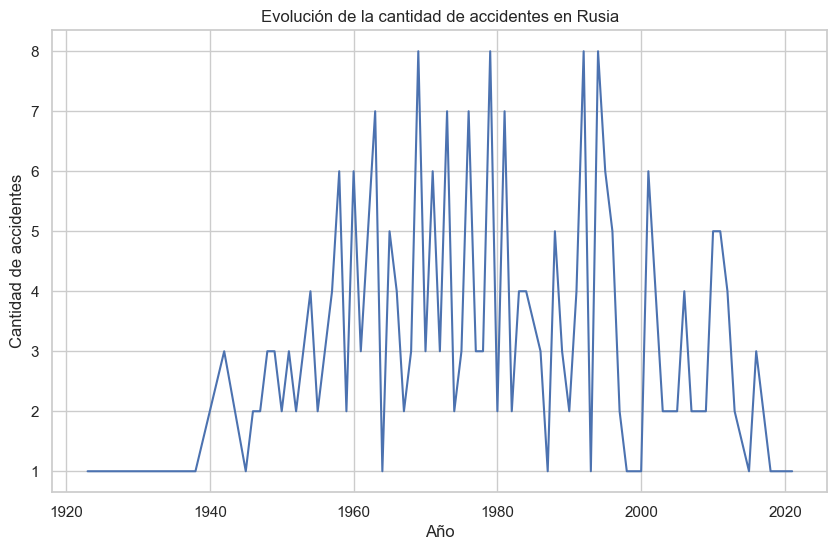

In [907]:
# Filtramos el DataFrame solo para los accidentes en Estados Unidos
accidentes_rusia = accidentes[accidentes['Pais'] == 'Russia']

# Agrupamos por año y contamos la cantidad de accidentes
accidentes_año = accidentes_rusia.groupby('Año').size().reset_index(name='count')

# Configuramos el estilo
sns.set(style="whitegrid")

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=accidentes_año, x='Año', y='count')

# Configuramos el título y las etiquetas de los ejes
plt.title('Evolución de la cantidad de accidentes en Rusia')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Mostrar el gráfico
plt.show()

In [908]:
# Filtramos el DataFrame solo para los accidentes en Rusia y a partir de 1990
rusia_filtro = accidentes[(accidentes['Pais'] == 'Russia') & (accidentes['Año'] >= 1990)]

# Agrupamos por año y contamos la cantidad de accidentes
accidentes_año = rusia_filtro.groupby('Año').size().reset_index(name='Cant_accidente')

# Calculamos la variación anual de accidentes
accidentes_año['accidentes_variacion'] = accidentes_año['Cant_accidente'].pct_change()

# Creamos un nuevo DataFrame con los resultados
accidente_variacion = accidentes_año[['Año','Cant_accidente', 'accidentes_variacion']].copy()

# Observamos el dataframe
accidente_variacion

,Año,Cant_accidente,accidentes_variacion
0,1990,2,NaN
1,1991,4,1.000000
2,1992,8,1.000000
3,1993,1,-0.875000
4,1994,8,7.000000
5,1995,6,-0.250000
6,1996,5,-0.166667
7,1997,2,-0.600000
8,1998,1,-0.500000
9,1999,1,0.000000


Se puede ver que a partir de 1994 arranca a bajar con un porcentaje mayor al 15% hasta el 2001 que se produce una subida importante pero logra
bajar devuelta y equilibrarce hasta el 2010 y 2011 que subio bastante pero de ese año en adelante fue bajando y hoy en dia se puedo equilibrar en 1
asique se podria decir que se cumplio el objetivo de reducir un 10% 

## KPI´S 3
## OBJETIVO: Aumentar como minimo un 10% de los sobrevivientes de la decada del 2011 al 2021 que la del 2001 al 2011

In [909]:
# Filtra los datos para incluir solo los años desde 2001 hasta 2021
accidentes_2001_2021 = accidentes[(accidentes['Año'] >= 2001) & (accidentes['Año'] <= 2021)]

# Agrupa los datos por año y suma las columnas "sobrevivientes" y "Todos_abordo"
datos_por_año = accidentes_2001_2021.groupby('Año')[['sobrevivientes', 'Todos_abordo']].sum().reset_index()

# Muestra el DataFrame resultante
print(datos_por_año)

     Año  sobrevivientes  Todos_abordo
0   2001           704.0        2040.0
1   2002           344.0        1715.0
2   2003           231.0        1510.0
3   2004           215.0         877.0
4   2005           857.0        2151.0
5   2006           256.0        1374.0
6   2007           577.0        1465.0
7   2008           750.0        1463.0
8   2009           534.0        1617.0
9   2010           425.0        1469.0
10  2011           264.0         984.0
11  2012           108.0         695.0
12  2013           495.0         782.0
13  2014            34.0        1176.0
14  2015            37.0         796.0
15  2016           388.0         903.0
16  2017            31.0         245.0
17  2018           365.0        1239.0
18  2019           127.0         432.0
19  2020           348.0         703.0
20  2021            49.0         227.0


In [910]:
# Filtra los datos para incluir solo los años desde 2001 hasta 2021
accidentes_2001_2021 = accidentes[(accidentes['Año'] >= 2001) & (accidentes['Año'] <= 2021)]

# Agrupa los datos por año y suma las columnas "sobrevivientes" y "Todos_abordo"
datos_por_año = accidentes_2001_2021.groupby('Año')[['sobrevivientes', 'Todos_abordo']].sum().reset_index()

# Calcula el porcentaje de sobrevivientes con respecto a "Todos_abordo" para cada año
datos_por_año['Porcentaje_Sobrevivientes'] = (datos_por_año['sobrevivientes'] / datos_por_año['Todos_abordo']) * 100

# Filtra los datos para la década del 2001 al 2011 y del 2011 al 2021
datos_2001_2011 = datos_por_año[(datos_por_año['Año'] >= 2001) & (datos_por_año['Año'] <= 2011)]
datos_2011_2021 = datos_por_año[(datos_por_año['Año'] >= 2011) & (datos_por_año['Año'] <= 2021)]

# Calcula el porcentaje promedio de sobrevivientes para cada década
porcentaje_promedio_2001_2011 = datos_2001_2011['Porcentaje_Sobrevivientes'].mean()
porcentaje_promedio_2011_2021 = datos_2011_2021['Porcentaje_Sobrevivientes'].mean()

# Calcula la diferencia entre los porcentajes promedio de las décadas
diferencia_porcentaje = porcentaje_promedio_2011_2021 - porcentaje_promedio_2001_2011

# Imprime los resultados
print(f'Porcentaje promedio de sobrevivientes en la década del 2001 al 2011: {porcentaje_promedio_2001_2011:.2f}%')
print(f'Porcentaje promedio de sobrevivientes en la década del 2011 al 2021: {porcentaje_promedio_2011_2021:.2f}%')
print(f'Diferencia en porcentaje entre las décadas: {diferencia_porcentaje:.2f}%')


Porcentaje promedio de sobrevivientes en la década del 2001 al 2011: 30.21%
Porcentaje promedio de sobrevivientes en la década del 2011 al 2021: 27.16%
Diferencia en porcentaje entre las décadas: -3.05%


Por lo que vemos en los resultados calculados pudimos ver que disminuyo un 3% el porcentaje de sobrevivientes de la decada anterior que la actual
por ende no se cumple la KPI establecida de aumentar un 10% el porcentaje de sobrevivientes

## Exportacion de csv

In [930]:
accidentes.to_csv('AccidentesAereos.csv', index=False, sep = ';')

In [926]:
paises_con_mas_accidentes.to_csv('Top_10_paises_accidentes.csv', index=False, sep = ';')

In [927]:
top_10_años.to_csv('Top_10_años_accidentes.csv', index=False, sep = ';')

In [928]:
top_10_aeronaves.to_csv('Top_10_aeronaves_accidentes.csv', index=False, sep = ';')